<a href="https://colab.research.google.com/github/pmendezt/Curso-de-analisis-de-datos/blob/main/Clase_4_Datos_Regresi%C3%B3n_LIneal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

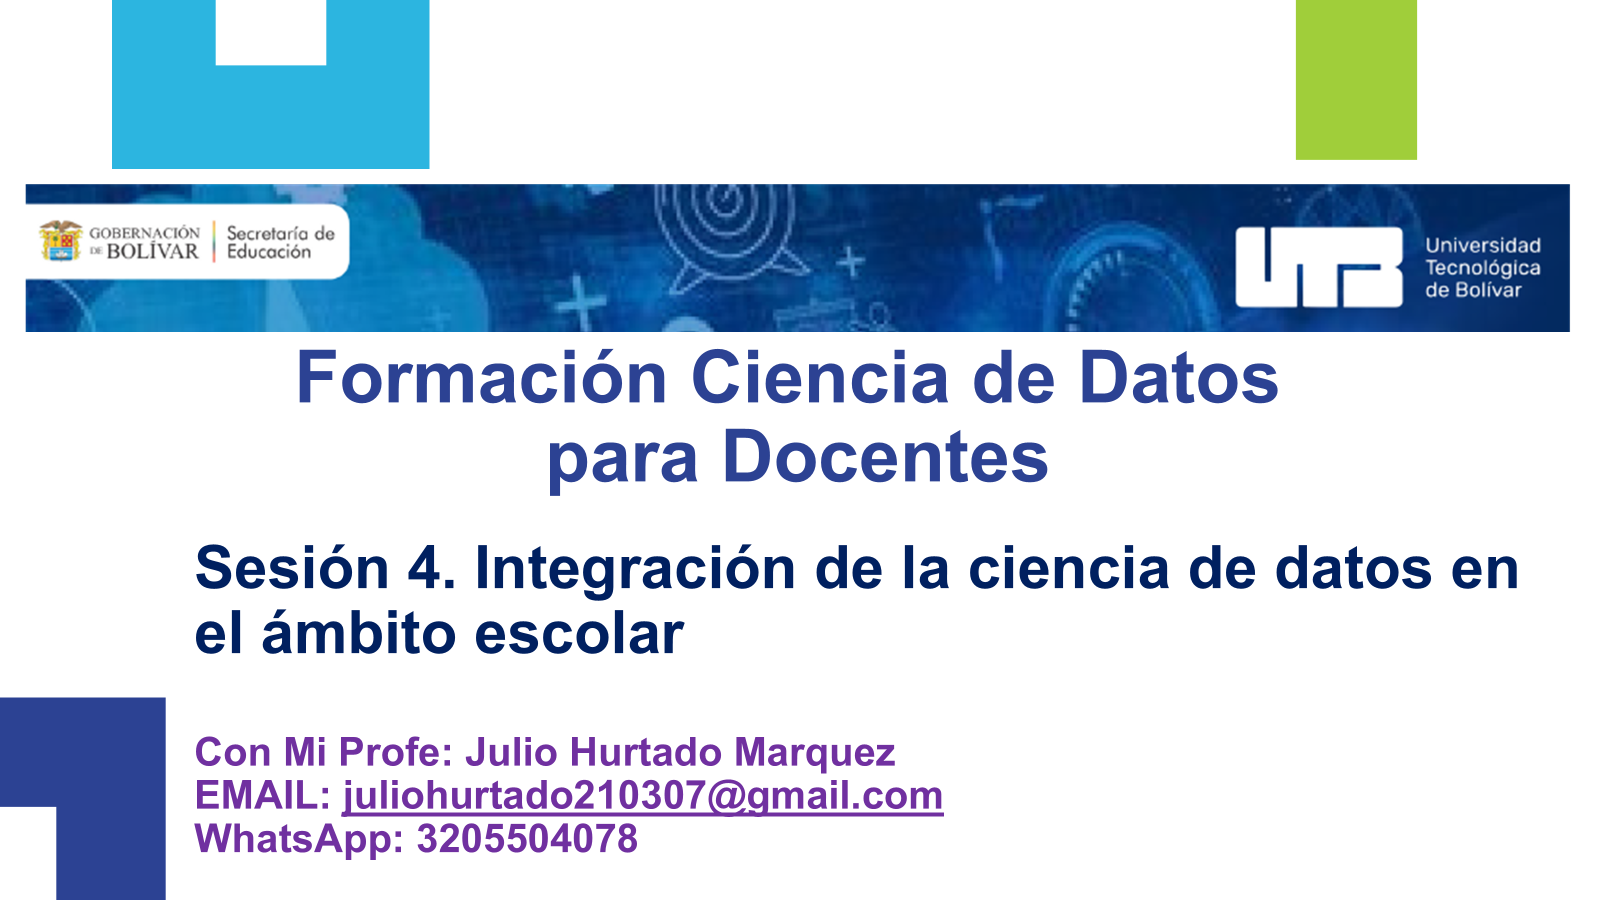

# **Regresión Lineal Simple y Multiple**

In [1]:
# @title **1. Importando las Librerias que usaremos**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import seaborn.objects as so
import statsmodels.api as sm

In [2]:
# @title **2. Exportamos nuestra última base de datos**
df_datos2 = pd.read_csv("/content/df_datos3.csv", delimiter=',')
df_datos2

,CURSO,ASISTENCIA2,ASISTENCIA1,DEFINITIVA,DEFINITIVA2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


In [3]:
# @title **Mostrar información del tipo de las  variables y registros nulos (null)**
Tipos_de_variables = df_datos2.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CURSO                                              74 non-null     object 
 1   ASISTENCIA2                                        74 non-null     int64  
 2   ASISTENCIA1                                        74 non-null     int64  
 3   DEFINITIVA                                         74 non-null     float64
 4   DEFINITIVA2                                        74 non-null     float64
 5   NRC                                                74 non-null     int64  
 6   PROGRAMA                                           74 non-null     object 
 7   EDAD                                               74 non-null     int64  
 8   PESO                                               74 non-null     int64  
 9   ESTATURA    

In [4]:
# @title **Convierte la variable NRC en object**
df_datos2['NRC'] = df_datos2['NRC'].astype(object)

In [5]:
# @title **Mostrar información del tipo de las  variables y registros nulos (null)**
Tipos_de_variables = df_datos2.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CURSO                                              74 non-null     object 
 1   ASISTENCIA2                                        74 non-null     int64  
 2   ASISTENCIA1                                        74 non-null     int64  
 3   DEFINITIVA                                         74 non-null     float64
 4   DEFINITIVA2                                        74 non-null     float64
 5   NRC                                                74 non-null     object 
 6   PROGRAMA                                           74 non-null     object 
 7   EDAD                                               74 non-null     int64  
 8   PESO                                               74 non-null     int64  
 9   ESTATURA    

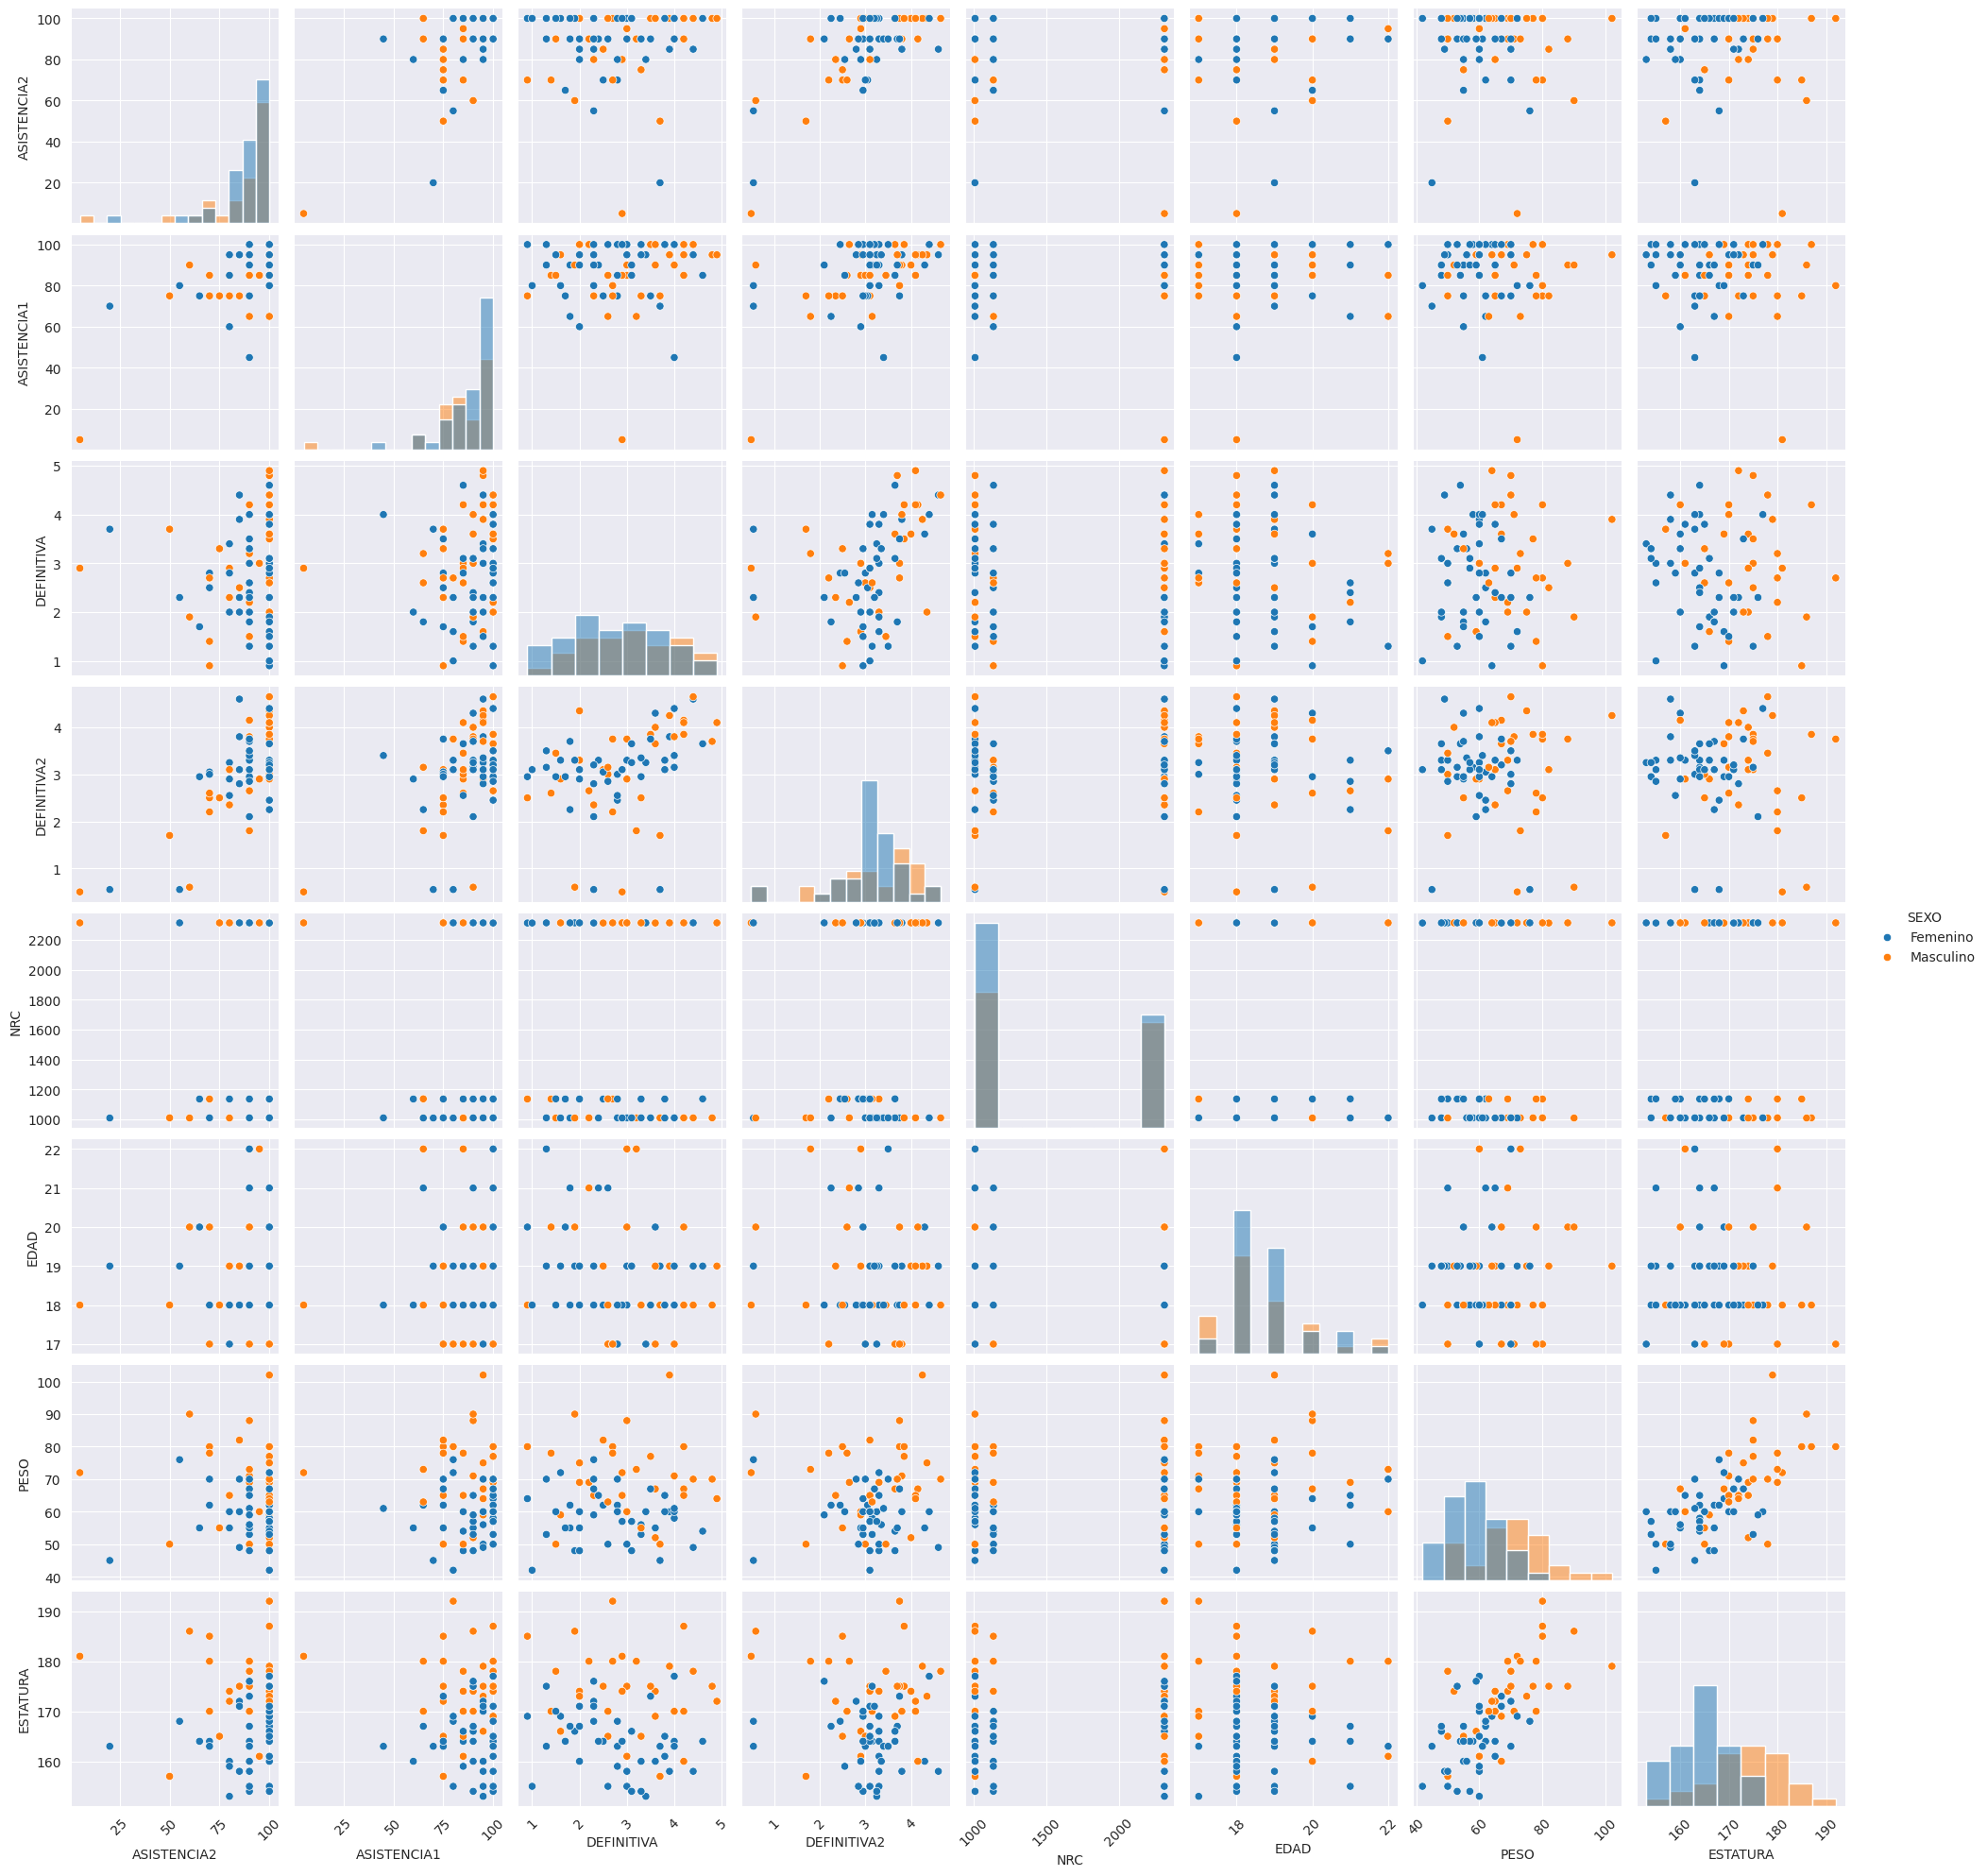

In [6]:
# @title **3. Visualización de las variables cuantitativas en diagramas de dispersión e Histogramas**
g = sns.pairplot(df_datos2, hue='SEXO', diag_kind = 'hist') # Definimos nuestro gráfico
for ax in g.axes.flat: # Un pequeño _for_ que recorra todas las variables
  plt.setp(ax.get_xticklabels(),rotation = 45) #Realizamos el grafico y estudiamos todas las relaciones entre las variables

In [7]:
# @title **Coeficientes  de correlación y $R^2$ para cada par de variables cuantitativas y su R cuandrado y me lo das en una lista, el coeficiente de correlación que tenga dos decimales y R cuadrado en porcentaje con dos decimales en un DataFrame

import pandas as pd

def calculate_correlation_and_r_squared(df):
  """
  Calcula el coeficiente de correlación de Pearson y R cuadrado para cada par de variables cuantitativas
  en un DataFrame y devuelve los resultados en un nuevo DataFrame.

  Args:
    df: El DataFrame de entrada.

  Returns:
    Un DataFrame que contiene el coeficiente de correlación y R cuadrado para cada par de variables cuantitativas.
  """

  correlation_results = []
  for col1 in df.select_dtypes(include=['number']).columns:
    for col2 in df.select_dtypes(include=['number']).columns:
      if col1 != col2:
        correlation = df[col1].corr(df[col2])
        r_squared = correlation ** 2

        correlation_results.append([col1, col2, round(correlation, 2), round(r_squared * 100, 2)])

  correlation_df = pd.DataFrame(correlation_results, columns=['Variable 1', 'Variable 2', 'Coeficiente de Correlación', 'R Cuadrado (%)'])
  return correlation_df


correlation_df = calculate_correlation_and_r_squared(df_datos2)
correlation_df

,Variable 1,Variable 2,Coeficiente de Correlación,R Cuadrado (%)
0,ASISTENCIA2,ASISTENCIA1,0.63,39.34
1,ASISTENCIA2,DEFINITIVA,0.08,0.64
2,ASISTENCIA2,DEFINITIVA2,0.73,52.72
3,ASISTENCIA2,EDAD,0.04,0.16
4,ASISTENCIA2,PESO,-0.06,0.42
5,ASISTENCIA2,ESTATURA,-0.04,0.14
6,ASISTENCIA1,ASISTENCIA2,0.63,39.34
7,ASISTENCIA1,DEFINITIVA,0.10,0.99
8,ASISTENCIA1,DEFINITIVA2,0.49,23.98
9,ASISTENCIA1,EDAD,0.05,0.27


from matplotlib import pyplot as plt
correlation_df['Coeficiente de Correlación'].plot(kind='hist', bins=20, title='Coeficiente de Correlación')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_df['R Cuadrado (%)'].plot(kind='hist', bins=20, title='R Cuadrado (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
correlation_df.groupby('Variable 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
correlation_df.groupby('Variable 2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_df.plot(kind='scatter', x='Coeficiente de Correlación', y='R Cuadrado (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_df['Coeficiente de Correlación'].plot(kind='line', figsize=(8, 4), title='Coeficiente de Correlación')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_df['R Cuadrado (%)'].plot(kind='line', figsize=(8, 4), title='R Cuadrado (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Variable 2'].value_counts()
    for x_label, grp in correlation_df.groupby('Variable 1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Variable 1')
_ = plt.ylabel('Variable 2')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(correlation_df['Variable 1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(correlation_df, x='Coeficiente de Correlación', y='Variable 1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(correlation_df['Variable 2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(correlation_df, x='Coeficiente de Correlación', y='Variable 2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(correlation_df['Variable 1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(correlation_df, x='R Cuadrado (%)', y='Variable 1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(correlation_df['Variable 2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(correlation_df, x='R Cuadrado (%)', y='Variable 2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
# @title **4. En el caso de encontrar datos o caracteres extraños**
df_datos2= df_datos2.replace(np.nan, '0')

In [9]:
df_datos2.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'DEFINITIVA', 'DEFINITIVA2',
       'NRC', 'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio'],
      dtype='object')

In [10]:
# @title **5. Redefinamos nuestras variables que vamos a usar en la regresión**
ASISTENCIA2 = df_datos2['ASISTENCIA2'].values
ASISTENCIA1 = df_datos2['ASISTENCIA1'].values
DEFINITIVA =df_datos2['DEFINITIVA'].values
DEFINITIVA2 = df_datos2['DEFINITIVA2'].values
EDAD = df_datos2['EDAD'].values
PESO =df_datos2['PESO'].values
ESTATURA = df_datos2['ESTATURA'].values

In [11]:
# @title **Viusualizando las variables con las cuales hacemos regresión lineal**
ASISTENCIA2

array([100,  70,  85,   5,  20, 100,  50, 100, 100,  95, 100, 100,  80,
        90, 100,  70,  90,  80,  85,  90, 100, 100, 100, 100, 100,  85,
        90, 100,  90, 100, 100,  80, 100, 100, 100,  70, 100,  90,  90,
        90, 100, 100,  90,  70,  80,  55,  90,  90, 100, 100,  90,  90,
       100, 100,  70, 100, 100, 100, 100,  80,  75,  60, 100,  90,  85,
        90, 100, 100,  90,  90,  85,  65, 100, 100])

In [12]:
ESTATURA

array([160, 185, 158, 181, 163, 169, 157, 155, 161, 161, 174, 164, 153,
       170, 174, 170, 160, 172, 158, 180, 175, 173, 166, 179, 178, 175,
       175, 169, 180, 170, 166, 160, 175, 165, 192, 164, 167, 154, 167,
       173, 155, 166, 160, 163, 174, 168, 158, 155, 168, 164, 178, 164,
       164, 175, 180, 187, 172, 177, 169, 159, 165, 186, 170, 163, 172,
       167, 154, 170, 163, 176, 171, 164, 171, 165])

In [13]:
# @title **6. Definimos las variables Dependientes y las Independientes**
X = np.array([ESTATURA]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y = np.array(PESO) # Variable dependiente

In [14]:
Y

array([ 55,  80,  60,  72,  45,  64,  50,  50,  65,  60,  69,  54,  60,
        71,  52,  78,  67,  65,  49,  69,  77,  75,  59, 102,  70,  82,
        88,  67,  73,  65,  48,  55,  70,  50,  80,  62,  62,  53,  55,
        67,  42,  48,  56,  70,  65,  76,  50,  50,  62,  58,  50,  65,
        57,  53,  78,  80,  64,  60,  72,  60,  55,  90,  63,  61,  70,
        48,  57,  60,  70,  59,  60,  55,  67,  60])

In [15]:
X

array([[160],
       [185],
       [158],
       [181],
       [163],
       [169],
       [157],
       [155],
       [161],
       [161],
       [174],
       [164],
       [153],
       [170],
       [174],
       [170],
       [160],
       [172],
       [158],
       [180],
       [175],
       [173],
       [166],
       [179],
       [178],
       [175],
       [175],
       [169],
       [180],
       [170],
       [166],
       [160],
       [175],
       [165],
       [192],
       [164],
       [167],
       [154],
       [167],
       [173],
       [155],
       [166],
       [160],
       [163],
       [174],
       [168],
       [158],
       [155],
       [168],
       [164],
       [178],
       [164],
       [164],
       [175],
       [180],
       [187],
       [172],
       [177],
       [169],
       [159],
       [165],
       [186],
       [170],
       [163],
       [172],
       [167],
       [154],
       [170],
       [163],
       [176],
       [171],
      

In [16]:
# @title **7. Definimos el Modelo de Regresión Lineal**
reg = LinearRegression() # Parte del Modelo
reg = reg.fit(X,Y) # Ajustar el modelo
Y_pred = reg.predict(X) # Predicción del modelo
error = np.sqrt(mean_squared_error(Y,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X,Y)


In [17]:
# @title **8. Los resultados del Modelo**

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Para recordar como definimos el par X, Y
# X = np.array([ESTATURA]).T
# Y = np.array(PESO)

# Así definimos el modelo de regresión lineal
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)

# Calculamos RMSE o sea el error cuadratico medio
rmse = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculamos la bondad de ajuste del modelo R^2
R_squared = r2_score(Y, Y_pred)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y, Y_pred)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared*100:.2f}%")
print(f"Coeficiente de correlación de Pearso es r ={r:.2f}")

El error cuadrático medio es RMSE = 8.4920
La bondad de ajuste o coeficiente de Determinación R^2: 43.30%
Coeficiente de correlación de Pearso es r =0.66


In [18]:
# @title **9. La recta de regresion estimada**

# Obtenmos los coeficientes del Modelo de regresión:  la pendiente (coeficiente de regresión) y la intersección (ordenada al origen)

pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada es: Y = 0.88X + -84.13


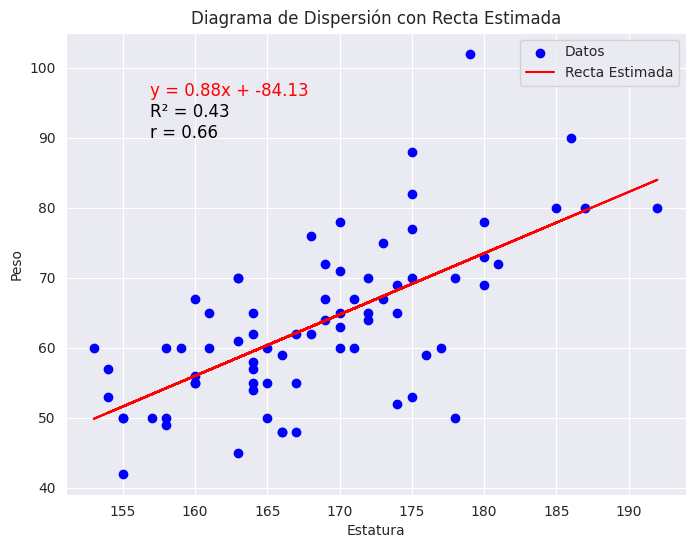

In [23]:
# @title **10. Diagrama de Dispersión con Recta Estimada**

# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos')

# Dibujar la recta estimada
plt.plot(X, Y_pred, color='red', label='Recta Estimada')

# Añadir la ecuación de la recta estimada
# y = mx + b, donde m es la pendiente y b es la intersección con el eje y
m = reg.coef_[0]
b = reg.intercept_
ecuacion = f'y = {m:.2f}x + {b:.2f}'
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.1*(max(Y)-min(Y)), ecuacion, fontsize=12, color='red')

# Añadir el valor de R^2 y r en el diagrama
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.15*(max(Y)-min(Y)), f'R² = {R_squared:.2f}', fontsize=12, color='black')
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.20*(max(Y)-min(Y)), f'r = {r:.2f}', fontsize=12, color='black')

# Etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión con Recta Estimada')
plt.legend()
plt.show()

In [25]:
# @title **11. Realizar una predicción para el Peso**

ESTATURA_1 = 175
#Y_pred = reg.predict(X)

# Assuming X was initially defined as a NumPy array with shape (n_samples, 1)
# You need to reshape ESTATURA_1 to have the same shape for prediction
# The predict function returns an array, extract the single prediction value
prediction = reg.predict([[ESTATURA_1]])[0]
print(f'La predicción del Peso para la estatura  Y({ESTATURA_1}) = {prediction:.2f}')

La predicción del Peso para la estatura  Y(175) = 69.11


In [27]:
# @title **En DataFrame coloca el Valor Observado $Y$, el Valor predicho ($Y_{pred}$) y el residuo ($Y-Y_{pred}$)**

# Assuming you have Y and Y_pred already calculated

df_results = pd.DataFrame({'Valor Observado (Y)': Y, 'Valor Predicho (Y_pred)': Y_pred, 'Residuo (Y-Y_pred)': Y - Y_pred})

df_results

,Valor Observado (Y),Valor Predicho (Y_pred),Residuo (Y-Y_pred)
0,55,55.976029,-0.976029
1,80,77.867085,2.132915
2,60,54.224745,5.775255
3,72,74.364516,-2.364516
4,45,58.602956,-13.602956
...,...,...,...
69,59,69.986305,-10.986305
70,60,65.608094,-5.608094
71,55,59.478598,-4.478598
72,67,65.608094,1.391906


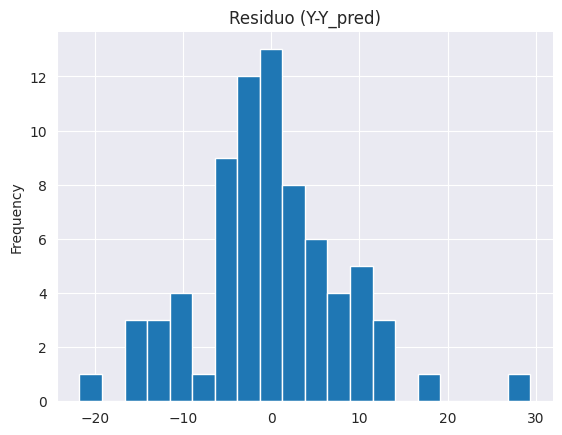

In [31]:
# @title Residuo (Y-Y_pred)

from matplotlib import pyplot as plt
df_results['Residuo (Y-Y_pred)'].plot(kind='hist', bins=20, title='Residuo (Y-Y_pred)')
plt.gca().spines[['top', 'right',]].set_visible(False)

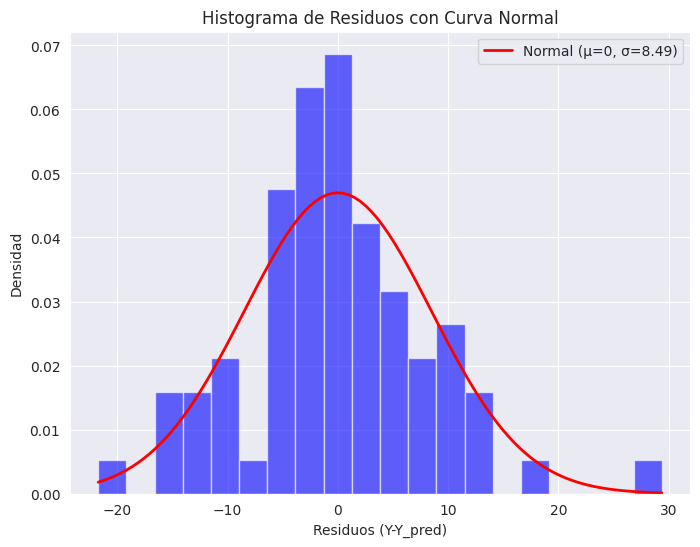

In [32]:
# prompt: En el histograma anterior superpon una curva normal de media 0 y varianza RMSE = 8.4920

# Calculate the mean and standard deviation of the residuals
mean_residuals = df_results['Residuo (Y-Y_pred)'].mean()
std_residuals = df_results['Residuo (Y-Y_pred)'].std()

# Generate x-values for the normal distribution curve
x_values = np.linspace(df_results['Residuo (Y-Y_pred)'].min(), df_results['Residuo (Y-Y_pred)'].max(), 100)

# Generate y-values for the normal distribution curve with mean 0 and std = RMSE
y_values = stats.norm.pdf(x_values, loc=0, scale=rmse)

# Plot the histogram and the normal curve
plt.figure(figsize=(8, 6))
plt.hist(df_results['Residuo (Y-Y_pred)'], bins=20, density=True, alpha=0.6, color='blue')
plt.plot(x_values, y_values, color='red', linewidth=2, label=f'Normal (μ=0, σ={rmse:.2f})')
plt.xlabel('Residuos (Y-Y_pred)')
plt.ylabel('Densidad')
plt.title('Histograma de Residuos con Curva Normal')
plt.legend()
plt.show()

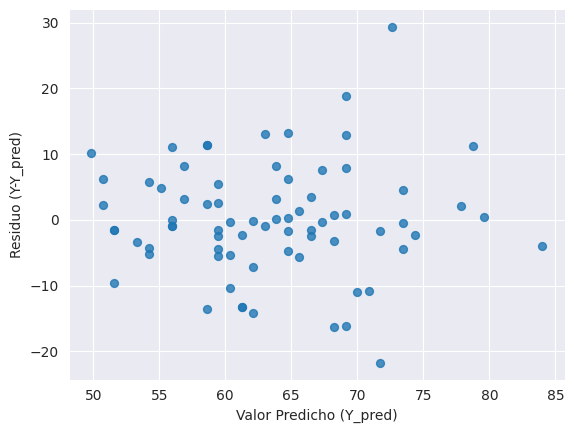

In [28]:
# @title Valor Predicho (Y_pred) vs Residuo (Y-Y_pred)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Valor Predicho (Y_pred)', y='Residuo (Y-Y_pred)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
# @title **12. Regresión Lineal Multiple con tres variables Independientes**
X2 = np.array([DEFINITIVA, EDAD, ASISTENCIA2 ]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y2 = np.array(DEFINITIVA2) # Variable dependiente
X2

array([[  3.6,  20. , 100. ],
       [  0.9,  18. ,  70. ],
       [  3.9,  19. ,  85. ],
       [  2.9,  18. ,   5. ],
       [  3.7,  19. ,  20. ],
       [  0.9,  20. , 100. ],
       [  3.7,  18. ,  50. ],
       [  3. ,  19. , 100. ],
       [  3.8,  18. , 100. ],
       [  3. ,  22. ,  95. ],
       [  2. ,  18. , 100. ],
       [  4.6,  19. , 100. ],
       [  3.4,  17. ,  80. ],
       [  4. ,  17. ,  90. ],
       [  3.6,  19. , 100. ],
       [  1.4,  20. ,  70. ],
       [  4.2,  20. ,  90. ],
       [  2.3,  19. ,  80. ],
       [  4.4,  19. ,  85. ],
       [  2.2,  21. ,  90. ],
       [  3.5,  18. , 100. ],
       [  2. ,  19. , 100. ],
       [  1.6,  19. , 100. ],
       [  3.9,  19. , 100. ],
       [  4.4,  18. , 100. ],
       [  2.5,  19. ,  85. ],
       [  3. ,  20. ,  90. ],
       [  3.6,  17. , 100. ],
       [  3.2,  22. ,  90. ],
       [  4.2,  18. , 100. ],
       [  1.9,  19. , 100. ],
       [  2. ,  18. ,  80. ],
       [  4.8,  18. , 100. ],
       [  

In [39]:
# @title **13. Preparando el modelo para implementar la Regresión Lineal múltiple**
reg2 = LinearRegression() # Parte del Modelo
reg2 = reg2.fit(X2,Y2) # Ajustar el modelo
Y_pred = reg2.predict(X2) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y2,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X2,Y2)


In [40]:
# @title **14. Los resultados del Modelo**

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Para recordar como definimos el par X, Y
# X = np.array([ESTATURA]).T
# Y = np.array(PESO)

# Así definimos el modelo de regresión lineal
reg2 = LinearRegression()
reg2 = reg2.fit(X2, Y2)
Y_pred2 = reg2.predict(X2)

# Calculamos RMSE o sea el error cuadratico medio
rmse2 = np.sqrt(mean_squared_error(Y2, Y_pred2))

# Calculamos la bondad de ajuste del modelo R^2
R_squared2 = r2_score(Y2, Y_pred2)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y2, Y_pred2)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse2:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared2*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r ={r:.2f}")

El error cuadrático medio es RMSE = 0.5324
La bondad de ajuste o coeficiente de Determinación R^2: 62.13%
Coeficiente de correlación de Pearson es r =0.79


In [41]:
# @title **15. Los coeficientes del Modelo y la recta de regresion estimada**
# Mis variables [DEFINITIVA, EDAD, ASISTENCIA2 ]= [X[0], X[1], x[2]]

intercepto = reg2.intercept_
coef_1 = reg2.coef_[0]
coef_2 = reg2.coef_[1]
coef_3 = reg2.coef_[2]

# imprime los coeficintes del Modelo de Regresión
print(f"Intercepto: {intercepto:.2f}")
print(f"Coeficiente 1: {coef_1:.2f}")
print(f"Coeficiente 2: {coef_2:.2f}")
print(f"Coeficiente 3: {coef_3:.2f}")

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {coef_1:.2f}X1 + {coef_2:.2f}X2 + {coef_3:.2f}X3 + {intercepto:.2f}")


Intercepto: 0.48
Coeficiente 1: 0.24
Coeficiente 2: -0.06
Coeficiente 3: 0.04
La recta de regresión estimada es: Y = 0.24X1 + -0.06X2 + 0.04X3 + 0.48


In [42]:
# @title **16. Los coeficientes del Modelo y la recta de regresion estimada de una forma mas elegante**

# Obtén los coeficientes del modelo de regresión Múltiple
coeficientes = reg2.coef_
intercepto = reg2.intercept_

# Imprime los coeficientes
print("Coeficientes del modelo reg2:")
for i, coef in enumerate(coeficientes):
  print(f"Coeficiente de la variable X{i+1}: {coef:.2f}")
print(f"Intercepto: {intercepto:.2f}")

# Ecuación de la recta del modelo de regresión Múltiple
print("\nEcuación de la recta de regresión:")
Ecuacion = "Y2 = "
for i, coef in enumerate(coeficientes):
  Ecuacion += f"{coef:.2f} * X{i+1} + "
Ecuacion += f"{intercepto:.2f}"
Ecuacion

Coeficientes del modelo reg2:
Coeficiente de la variable X1: 0.24
Coeficiente de la variable X2: -0.06
Coeficiente de la variable X3: 0.04
Intercepto: 0.48

Ecuación de la recta de regresión:


'Y2 = 0.24 * X1 + -0.06 * X2 + 0.04 * X3 + 0.48'

In [44]:
# @title **17. Otras métricas del modelo de Regresión Multiple**
print(f'Error Medio Absoluto - MAE = {mean_absolute_error(Y2,Y_pred2):.3f}' )
print(f"Cuadrado Medio del error - MSE = {mean_squared_error(Y2,Y_pred2):.3f}")
print(f"Desviación Cuadrática Media - RMSE = {np.sqrt(mean_squared_error(Y2,Y_pred2)):.3f}")
r2 = r2_score(Y2,Y_pred2)
print(f'R cuadrado - Model Score: R2 = {r2*100:.2f}%')

Error Medio Absoluto - MAE = 0.418
Cuadrado Medio del error - MSE = 0.283
Desviación Cuadrática Media - RMSE = 0.532
R cuadrado - Model Score: R2 = 62.13%


In [45]:
# @title **TAREA: Hacer la regresión múltiple para ASISTENCIA1 en vez de EDAD**

# @title **12. Regresión Lineal Multiple con tres variables Independientes**
X2 = np.array([DEFINITIVA, ASISTENCIA1, ASISTENCIA2 ]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y2 = np.array(DEFINITIVA2) # Variable dependiente
X2

array([[  3.6,  90. , 100. ],
       [  0.9,  75. ,  70. ],
       [  3.9,  95. ,  85. ],
       [  2.9,   5. ,   5. ],
       [  3.7,  70. ,  20. ],
       [  0.9, 100. , 100. ],
       [  3.7,  75. ,  50. ],
       [  3. ,  95. , 100. ],
       [  3.8, 100. , 100. ],
       [  3. ,  85. ,  95. ],
       [  2. , 100. , 100. ],
       [  4.6,  85. , 100. ],
       [  3.4,  95. ,  80. ],
       [  4. ,  90. ,  90. ],
       [  3.6,  90. , 100. ],
       [  1.4,  85. ,  70. ],
       [  4.2,  95. ,  90. ],
       [  2.3,  75. ,  80. ],
       [  4.4,  95. ,  85. ],
       [  2.2, 100. ,  90. ],
       [  3.5, 100. , 100. ],
       [  2. ,  95. , 100. ],
       [  1.6,  95. , 100. ],
       [  3.9,  95. , 100. ],
       [  4.4, 100. , 100. ],
       [  2.5,  75. ,  85. ],
       [  3. ,  90. ,  90. ],
       [  3.6, 100. , 100. ],
       [  3.2,  65. ,  90. ],
       [  4.2,  85. , 100. ],
       [  1.9,  90. , 100. ],
       [  2. ,  60. ,  80. ],
       [  4.8,  95. , 100. ],
       [  

In [46]:
# Preparando el modelo para implementar la Regresión Lineal múltiple
reg2 = LinearRegression() # Parte del Modelo
reg2 = reg2.fit(X2,Y2) # Ajustar el modelo
Y_pred = reg2.predict(X2) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y2,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X2,Y2)

In [47]:
# Los resultados del Modelo

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Para recordar como definimos el par X, Y
# X = np.array([ESTATURA]).T
# Y = np.array(PESO)

# Así definimos el modelo de regresión lineal
reg2 = LinearRegression()
reg2 = reg2.fit(X2, Y2)
Y_pred2 = reg2.predict(X2)

# Calculamos RMSE o sea el error cuadratico medio
rmse2 = np.sqrt(mean_squared_error(Y2, Y_pred2))

# Calculamos la bondad de ajuste del modelo R^2
R_squared2 = r2_score(Y2, Y_pred2)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y2, Y_pred2)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse2:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared2*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r ={r:.2f}")

El error cuadrático medio es RMSE = 0.5367
La bondad de ajuste o coeficiente de Determinación R^2: 61.51%
Coeficiente de correlación de Pearson es r =0.78


In [51]:
# Defino las variables distinguiendo las componentes de
intercepto = reg2.intercept_
coef_1 = reg2.coef_[0]
coef_2 = reg2.coef_[1]
coef_3 = reg2.coef_[2]

# imprime los coeficintes del Modelo de Regresión
print(f"Intercepto: {intercepto:.2f}")
print(f"Coeficiente 1: {coef_1:.2f}")
print(f"Coeficiente 2: {coef_2:.4f}")
print(f"Coeficiente 3: {coef_3:.2f}")

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {coef_1:.2f}X1 + {coef_2:.2f}X2 + {coef_3:.2f}X3 + {intercepto:.2f}")


Intercepto: -0.77
Coeficiente 1: 0.26
Coeficiente 2: 0.0019
Coeficiente 3: 0.03
La recta de regresión estimada es: Y = 0.26X1 + 0.00X2 + 0.03X3 + -0.77


In [49]:
# Obtén los coeficientes del modelo de regresión Múltiple
coeficientes = reg2.coef_
intercepto = reg2.intercept_

# Imprime los coeficientes
print("Coeficientes del modelo reg2:")
for i, coef in enumerate(coeficientes):
  print(f"Coeficiente de la variable X{i+1}: {coef:.2f}")
print(f"Intercepto: {intercepto:.2f}")

# Ecuación de la recta del modelo de regresión Múltiple
print("\nEcuación de la recta de regresión:")
Ecuacion = "Y2 = "
for i, coef in enumerate(coeficientes):
  Ecuacion += f"{coef:.2f} * X{i+1} + "
Ecuacion += f"{intercepto:.2f}"
Ecuacion

Coeficientes del modelo reg2:
Coeficiente de la variable X1: 0.26
Coeficiente de la variable X2: 0.00
Coeficiente de la variable X3: 0.03
Intercepto: -0.77

Ecuación de la recta de regresión:


'Y2 = 0.26 * X1 + 0.00 * X2 + 0.03 * X3 + -0.77'

In [53]:
# @title **18. Realizar una predicción para el DEFINITIVA2**
DEFINITIVA_1 = 4.3
EDAD_1 = 21
ASISTENCIA1_1 = 90


prediccion = reg.predict([[DEFINITIVA_1, EDAD_1,ASISTENCIA1_1]])[0]

print(f'La predicción Definitiva 2 cuando  Y{DEFINITIVA_1, EDAD_1,ASISTENCIA1_1} = {prediccion:.2f}')

La predicción Definitiva 2 cuando  Y(4.3, 21, 90) = 3.44


In [54]:
# @title **Mis variables**

df_datos2.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'DEFINITIVA', 'DEFINITIVA2',
       'NRC', 'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio'],
      dtype='object')

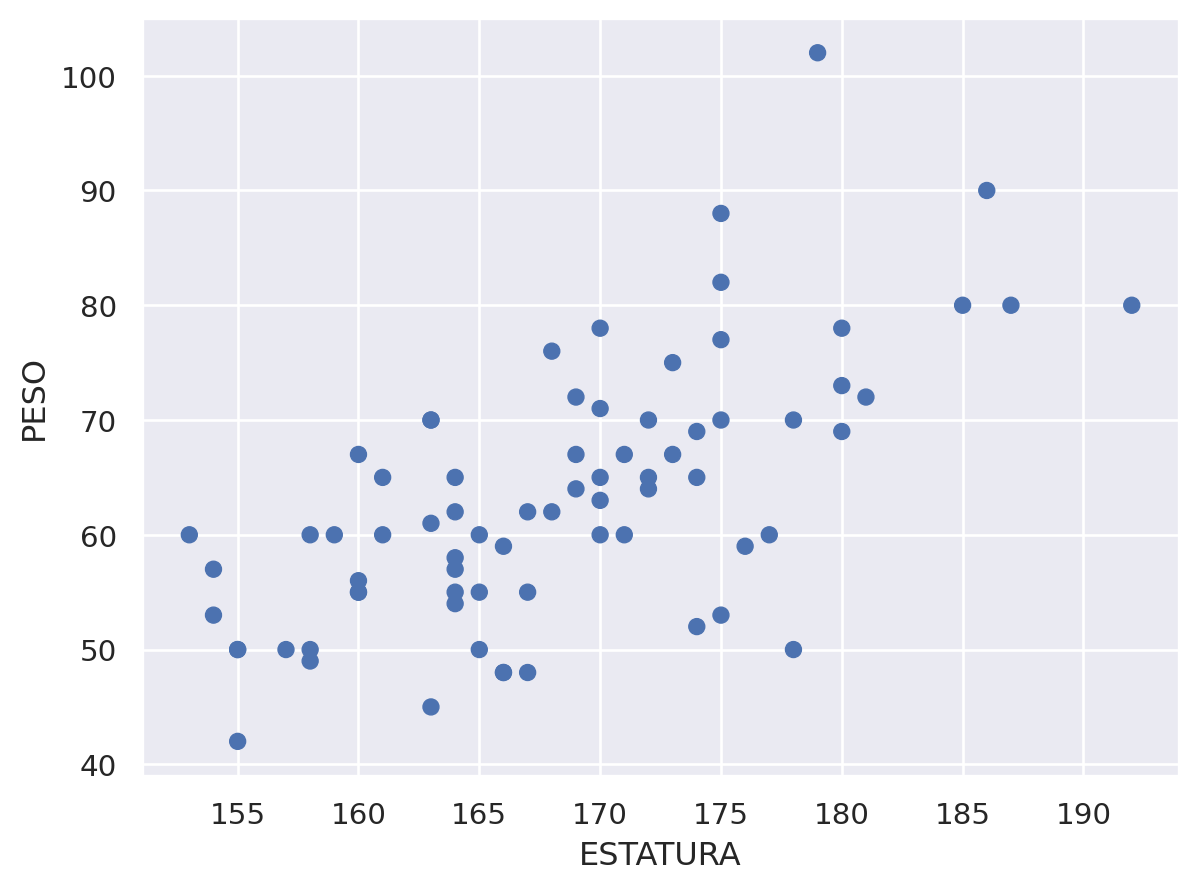

In [ ]:
# @title **19. Mas sobre Regresión Lineal - Gráfico de Dispersión "ESTATURA vs PESO"**

p = so.Plot(df_datos2, "ESTATURA", "PESO").add(so.Dot())
p

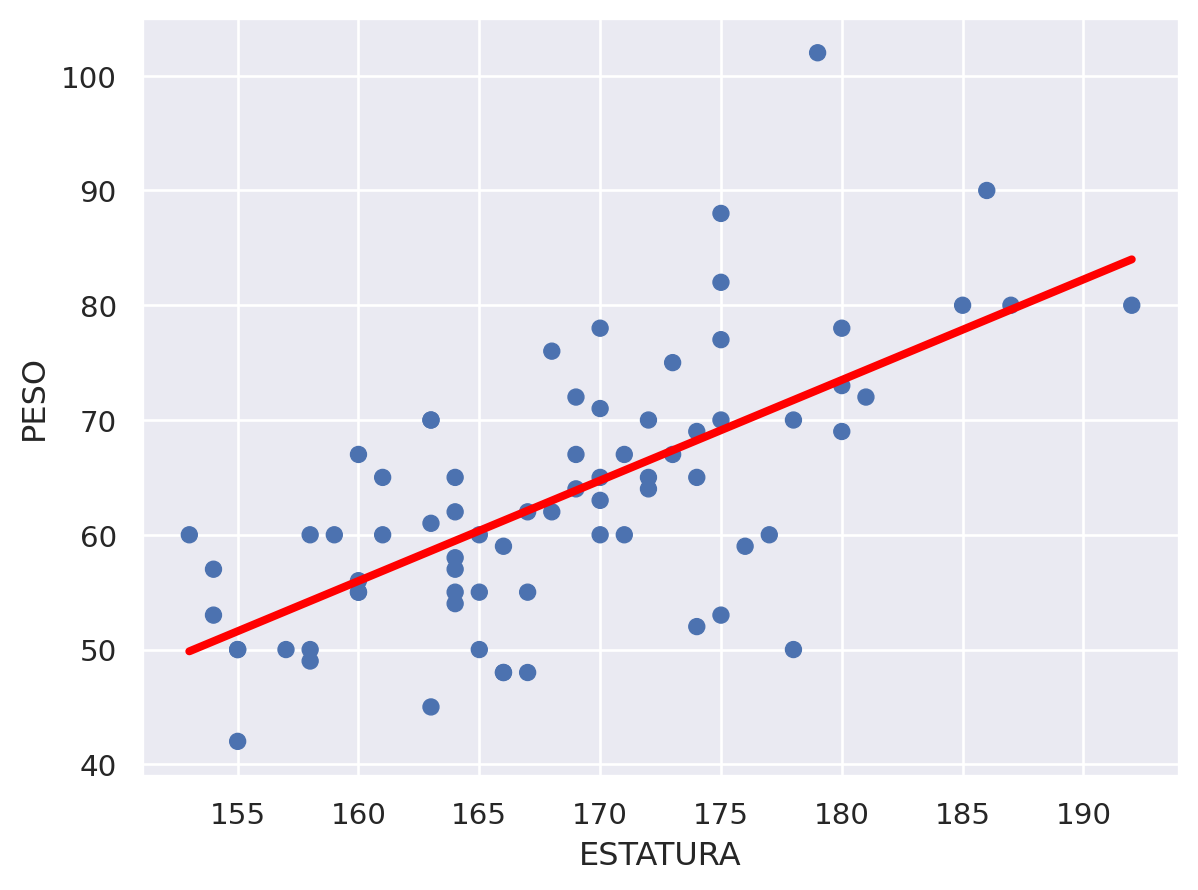

In [58]:


# @title **20. Gráfico de Dispersión y recta de estimación**
p = so.Plot(df_datos2, "ESTATURA", "PESO").add(so.Dot())
p.add(so.Line(color="red", linewidth=3), so.PolyFit(1))

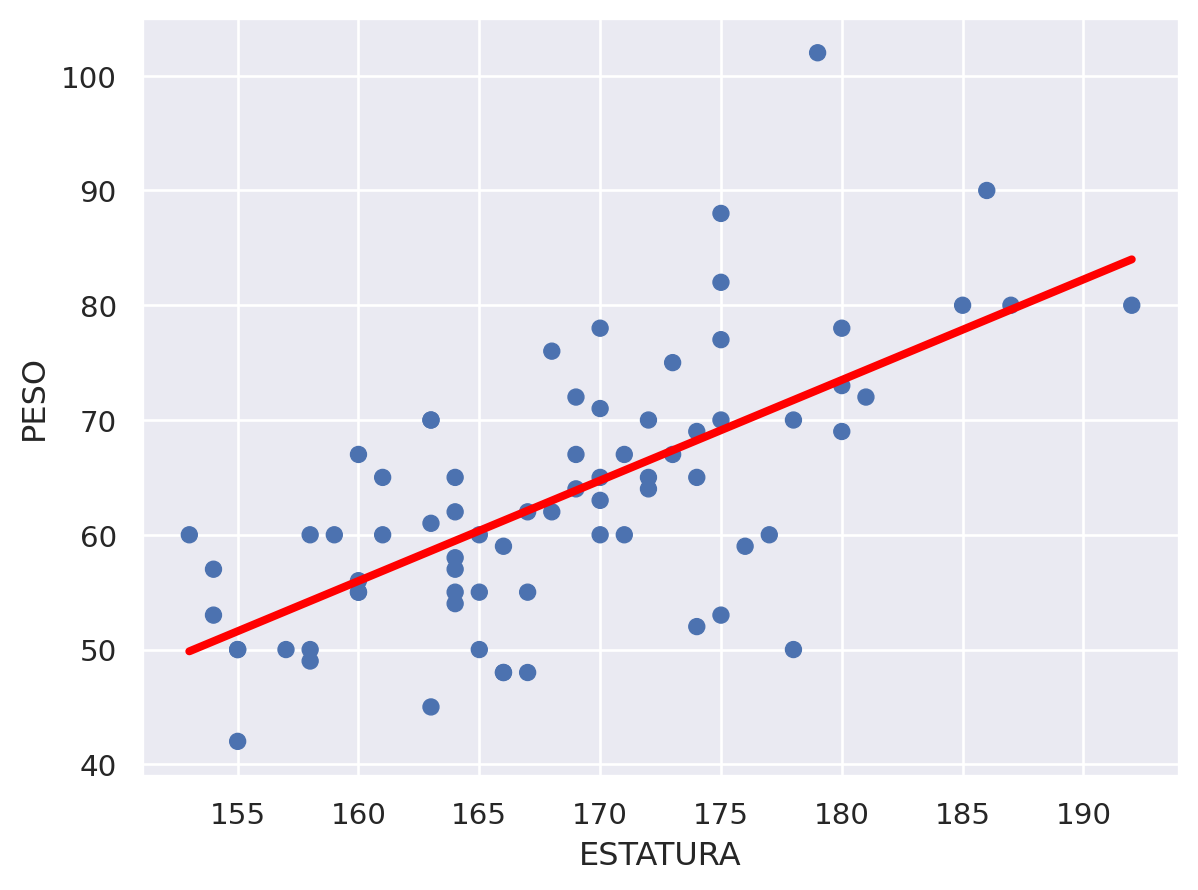

In [59]:
# Jugar con el grado del polinomio
p = so.Plot(df_datos2, "ESTATURA", "PESO").add(so.Dot())
p.add(so.Line(color="red", linewidth=3), so.PolyFit(1))

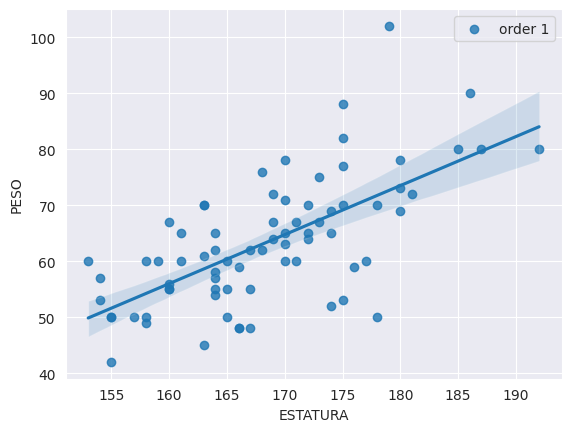

In [60]:
# @title **21. Gráfico de Dispersión  usando _sns.regplot_**

sns.regplot(x="ESTATURA", y="PESO", scatter=True, order=1, data=df_datos2, label="order 1")
plt.legend(loc="upper right")

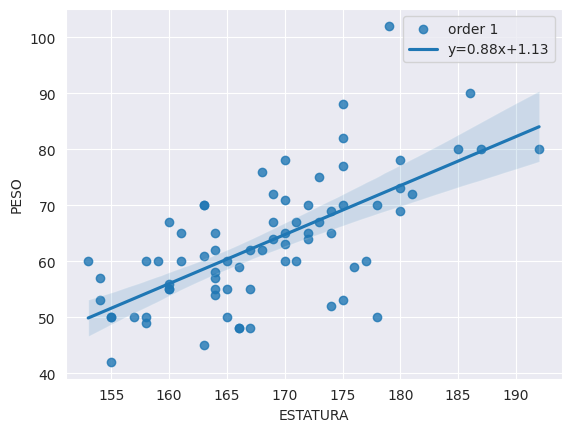

In [ ]:
# @title **22. Gráfico de Dispersión usando _sns.regplot_ y la recta de regresión**
sns.regplot(x="ESTATURA", y="PESO", scatter=True, order=1, data=df_datos2, label="order 1", line_kws={'label':"y={0:.2f}x+{1:.2f}".format(pendiente, intercepto)})
plt.legend(loc="upper right")

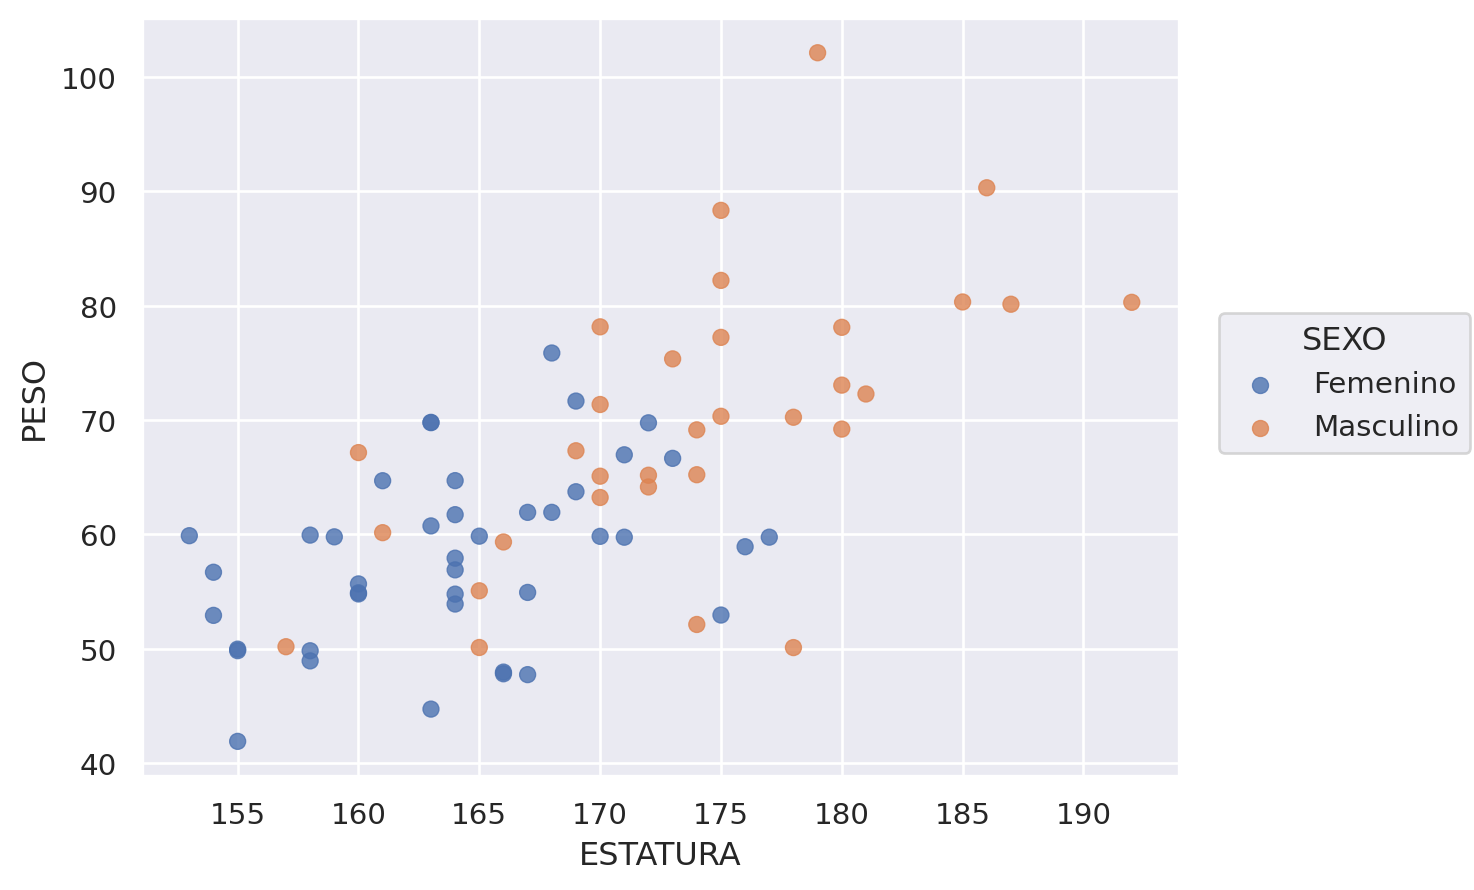

In [61]:
# @title **23.  Gráfico de Dispersión de las tres variables cuantitativas relacionadas ESTATURA vs PESO vs SEXO**
so.Plot(df_datos2, x="ESTATURA", y="PESO", color="SEXO").add(so.Dot(alpha=.8), so.Dodge(), so.Jitter(.8), orient="y")


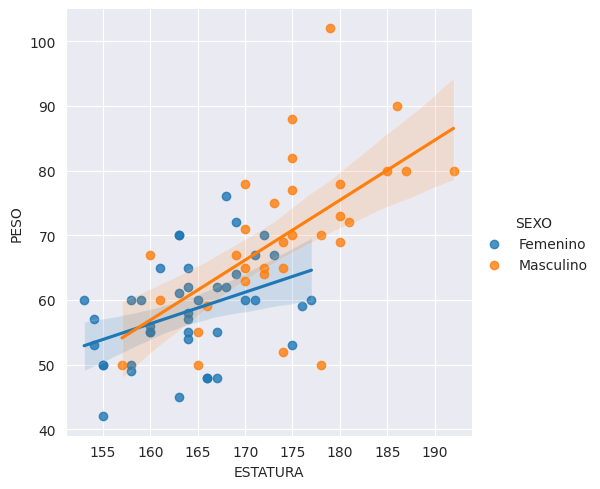

In [ ]:
# @title **24.  Gráfico de Dispersión - "ESTATURA vs PESO" vs "SEXO" y sus rectas**
sns.lmplot(x="ESTATURA", y="PESO", hue="SEXO", data=df_datos2)

In [62]:
# @title **25.  Halla la Recta de regresión para PESO vs ESTATURA para SEXO = Femenino**

# Filtrar el DataFrame para incluir solo los datos de sexo femenino
df_femenino = df_datos2[df_datos2['SEXO'] == 'Femenino']

# Definir las variables independientes (X) y dependientes (Y)
X = df_femenino['ESTATURA'].values.reshape(-1, 1)  # ESTATURA como variable independiente
Y = df_femenino['PESO'].values  # PESO como variable dependiente

# Crear un modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X, Y)

# Obtener los coeficientes de la regresión (pendiente e intersección)
pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprimir la ecuación de la recta de regresión
print(f"La recta de regresión estimada para PESO vs ESTATURA (SEXO = Femenino) es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada para PESO vs ESTATURA (SEXO = Femenino) es: Y = 0.49X + -21.57


In [63]:
# @title **26.  Halla la Recta de regresión para PESO vs ESTATURA para SEXO = Masculino**

# Filtrar el DataFrame para incluir solo los datos de sexo masculino
df_masculino = df_datos2[df_datos2['SEXO'] == 'Masculino']

# Definir las variables independientes (X) y dependientes (Y)
X = df_masculino['ESTATURA'].values.reshape(-1, 1)  # ESTATURA como variable independiente
Y = df_masculino['PESO'].values  # PESO como variable dependiente

# Crear un modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X, Y)

# Obtener los coeficientes de la regresión (pendiente e intersección)
pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprimir la ecuación de la recta de regresión
print(f"La recta de regresión estimada para PESO vs ESTATURA (SEXO = Masculino) es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada para PESO vs ESTATURA (SEXO = Masculino) es: Y = 0.93X + -91.30


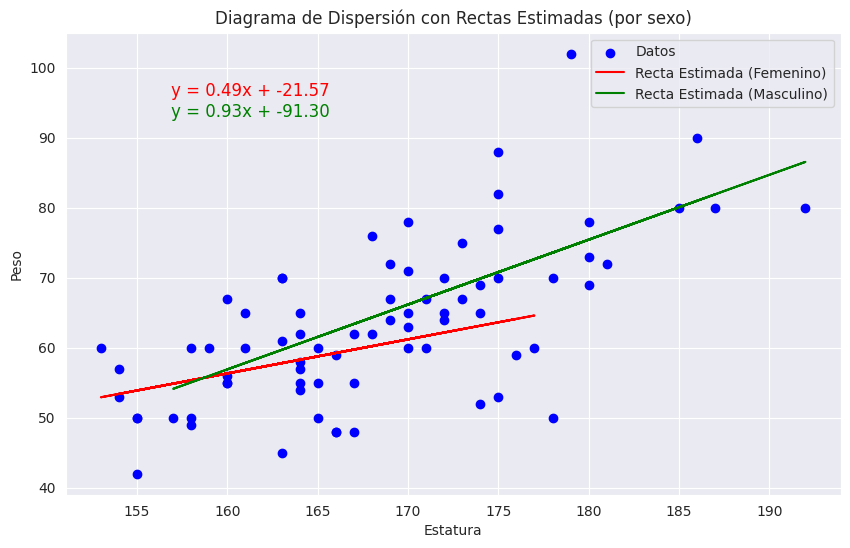

In [64]:
# @title **27.  Dibujame grafico de dispersion las dos rectas estimadas y su ecuacion**

# Crear el diagrama de dispersión con las dos rectas estimadas
plt.figure(figsize=(10, 6))
plt.scatter(df_datos2['ESTATURA'], df_datos2['PESO'], color='blue', label='Datos')

# Dibujar la recta estimada para el sexo femenino
df_femenino = df_datos2[df_datos2['SEXO'] == 'Femenino']
X_femenino = df_femenino['ESTATURA'].values.reshape(-1, 1)
Y_femenino = df_femenino['PESO'].values
reg_femenino = LinearRegression().fit(X_femenino, Y_femenino)
Y_pred_femenino = reg_femenino.predict(X_femenino)
plt.plot(X_femenino, Y_pred_femenino, color='red', label='Recta Estimada (Femenino)')

# Dibujar la recta estimada para el sexo masculino
df_masculino = df_datos2[df_datos2['SEXO'] == 'Masculino']
X_masculino = df_masculino['ESTATURA'].values.reshape(-1, 1)
Y_masculino = df_masculino['PESO'].values
reg_masculino = LinearRegression().fit(X_masculino, Y_masculino)
Y_pred_masculino = reg_masculino.predict(X_masculino)
plt.plot(X_masculino, Y_pred_masculino, color='green', label='Recta Estimada (Masculino)')


# Obtener la ecuación de la recta estimada para femenino
pendiente_femenino = reg_femenino.coef_[0]
intercepto_femenino = reg_femenino.intercept_
ecuacion_femenino = f'y = {pendiente_femenino:.2f}x + {intercepto_femenino:.2f}'
plt.text(min(df_datos2['ESTATURA']) + 0.1*(max(df_datos2['ESTATURA'])-min(df_datos2['ESTATURA'])), max(df_datos2['PESO'])-0.1*(max(df_datos2['PESO'])-min(df_datos2['PESO'])), ecuacion_femenino, fontsize=12, color='red')


# Obtener la ecuación de la recta estimada para masculino
pendiente_masculino = reg_masculino.coef_[0]
intercepto_masculino = reg_masculino.intercept_
ecuacion_masculino = f'y = {pendiente_masculino:.2f}x + {intercepto_masculino:.2f}'
plt.text(min(df_datos2['ESTATURA']) + 0.1*(max(df_datos2['ESTATURA'])-min(df_datos2['ESTATURA'])), max(df_datos2['PESO'])-0.15*(max(df_datos2['PESO'])-min(df_datos2['PESO'])), ecuacion_masculino, fontsize=12, color='green')




# Etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión con Rectas Estimadas (por sexo)')
plt.legend()
plt.show()

In [66]:
df_datos2.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'DEFINITIVA', 'DEFINITIVA2',
       'NRC', 'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio'],
      dtype='object')

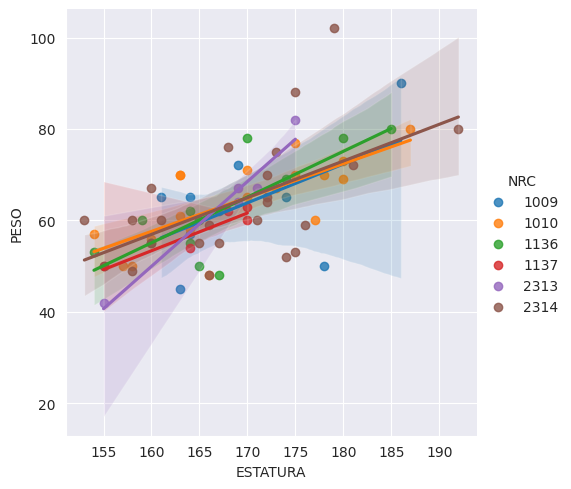

In [67]:
# @title **28.  Gráfico de Dispersión - "ESTATURA vs PESO" vs "ESTRATO" y sus rectas**
sns.lmplot(x="ESTATURA", y="PESO", hue="NRC", data=df_datos2)

In [69]:
# @title **29. Construye un DataFrame que contenga para cada NRC los coeficientes de regresión, de correlación y R cuadrado en porcentaje y dos decimales**

# Supongamos que tienes un DataFrame llamado df_datos2 con las columnas necesarias
# (ESTATURA, PESO, SEXO, NRC) y que deseas realizar la regresión lineal para cada NRC

def regression_analysis_by_nrc(df):
    results_df = pd.DataFrame(columns=['NRC', 'Coeficiente', 'Correlacion', 'R2'])
    for nrc in df['NRC'].unique():
        df_nrc = df[df['NRC'] == nrc]

        if len(df_nrc) > 1:  # Necesitamos al menos dos datos para la regresión
            X = df_nrc['ESTATURA'].values.reshape(-1, 1)
            Y = df_nrc['PESO'].values

            reg = LinearRegression().fit(X, Y)
            Y_pred = reg.predict(X)

            rmse = np.sqrt(mean_squared_error(Y, Y_pred))
            r_squared = r2_score(Y, Y_pred)
            correlation = np.corrcoef(Y, Y_pred)[0, 1]

            results_df = pd.concat([results_df, pd.DataFrame({'NRC': [nrc],
                                                              'Coeficiente': [reg.coef_[0]],
                                                              'Correlacion': [correlation],
                                                              'R2': [r_squared]})])
    results_df['R2'] = (results_df['R2'] * 100).round(2)
    results_df['Coeficiente'] = results_df['Coeficiente'].round(2)
    results_df['Correlacion'] = results_df['Correlacion'].round(2)

    return results_df

# Llama a la función con tu DataFrame
df_results = regression_analysis_by_nrc(df_datos2)
df_results


<ipython-input-69-77786ce7070a>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'NRC': [nrc],


,NRC,Coeficiente,Correlacion,R2
0,2314,0.80,0.56,31.36
0,1136,1.00,0.78,60.95
0,1009,0.85,0.54,29.16
0,2313,1.85,0.98,95.40
0,1010,0.74,0.73,53.36
0,1137,0.83,0.93,86.90


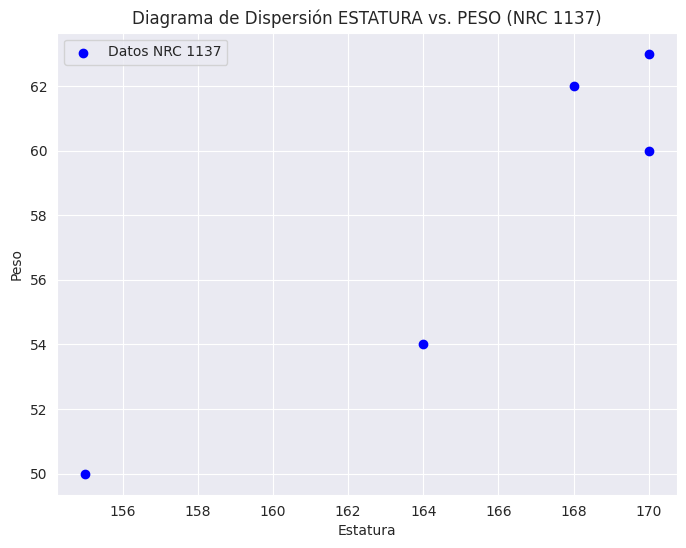

In [70]:
# prompt: Construye el diagrama de dispersión ESTATURA vs. PESO solo para NRC 1137

# Filtrar el DataFrame para incluir solo los datos del NRC 1137
df_1137 = df_datos2[df_datos2['NRC'] == 1137]

# Crear el diagrama de dispersión para el NRC 1137
plt.figure(figsize=(8, 6))
plt.scatter(df_1137['ESTATURA'], df_1137['PESO'], color='blue', label='Datos NRC 1137')

# Etiquetas de los ejes y título
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title('Diagrama de Dispersión ESTATURA vs. PESO (NRC 1137)')
plt.legend()
plt.show()